### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from scipy import stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import SCORERS, accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### EDA

In [2]:
# Readig The dataset
data       = pd.read_csv('train.csv')
data_test  = pd.read_csv('test.csv')



In [3]:
data.drop('ID', axis=1, inplace=True)
data.head()



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [4]:
data.isna().sum()


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [6]:
data.describe()



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [7]:
data['y'].value_counts()



DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

## Handle Imbalanced Classes Methods

In [8]:
# class count
class_count_0, class_count_1, class_count_2, class_count_3, class_count_4, class_count_5, class_count_6 = data['y'].value_counts()

# Separate class
class_0 = data[data['y'] == 'DERMASON']
class_1 = data[data['y'] == 'SIRA']
class_2 = data[data['y'] == 'SEKER']
class_3 = data[data['y'] == 'HOROZ']
class_4 = data[data['y'] == 'CALI']
class_5 = data[data['y'] == 'BARBUNYA']
class_6 = data[data['y'] == 'BOMBAY']

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)

class 0: (2837, 17)
class 1: (2109, 17)
class 2: (1621, 17)
class 3: (1488, 17)
class 4: (1304, 17)
class 5: (1057, 17)
class 6: (418, 17)


#### 1- Random Under-Sampling

In [9]:
# class_0_under = class_0.sample(class_count_6)
# class_1_under = class_1.sample(class_count_6)
# class_2_under = class_2.sample(class_count_6)
# class_3_under = class_3.sample(class_count_6)
# class_4_under = class_4.sample(class_count_6)
# class_5_under = class_5.sample(class_count_6)


# data = pd.concat([class_0_under,
#                         class_1_under,
#                         class_2_under,
#                         class_3_under,
#                         class_4_under,
#                         class_5_under,
#                         class_6], axis=0)

# print("total class of 1 and 0:",data['y'].value_counts())# plot the count after under-sampeling
# data['y'].value_counts().plot(kind='bar', title='count (target)')

#### 2- Random Over-Sampling

In [10]:
# class_1_over = class_1.sample(class_count_0, replace=True)
# class_2_over = class_2.sample(class_count_0, replace=True)
# class_3_over = class_3.sample(class_count_0, replace=True)
# class_4_over = class_4.sample(class_count_0, replace=True)
# class_5_over = class_5.sample(class_count_0, replace=True)
# class_6_over = class_6.sample(class_count_0, replace=True)


# data = pd.concat([class_1_over,
#                         class_2_over,
#                         class_3_over,
#                         class_4_over,
#                         class_5_over,
#                         class_6_over,
#                         class_0], axis=0)

# print("total class of 1 and 0:",data['y'].value_counts())# plot the count after under-sampeling
# data['y'].value_counts().plot(kind='bar', title='count (target)')

#### 3- Over + Under == 2109

In [11]:
# class_0_under = class_0.sample(class_count_1)
# class_2_under = class_2.sample(class_count_1, replace=True)
# class_3_under = class_3.sample(class_count_1, replace=True)
# class_4_under = class_4.sample(class_count_1, replace=True)
# class_5_under = class_5.sample(class_count_1, replace=True)
# class_6_under = class_6.sample(class_count_1, replace=True)


# data = pd.concat([class_0_under,
#                         class_2_under,
#                         class_3_under,
#                         class_4_under,
#                         class_5_under,
#                         class_6_under,
#                         class_1], axis=0)

# print("total class of 1 and 0:",data['y'].value_counts())# plot the count after under-sampeling
# data['y'].value_counts().plot(kind='bar', title='count (target)')

#### 4- Random Over-Sampling - Mohand

In [12]:
# from imblearn.over_sampling import RandomOverSampler

# oversample = RandomOverSampler(sampling_strategy='all')
# X=data.drop('y',axis=1)
# X_train_copy,y_train_copy = oversample.fit_resample(X,data[['y']])


In [13]:
# data=pd.concat([X_train_copy,y_train_copy],axis=1)


In [14]:
# data['y'].value_counts()


#### 5- Random under-sampling with imblearn

In [15]:
# # import library
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
# X=data.drop('y',axis=1)
# x_rus, y_rus = rus.fit_resample(X, data[['y']])

In [16]:
# data=pd.concat([x_rus,y_rus],axis=1)


#### 6- Random over-sampling with imblearn

In [17]:
# # import library
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X=data.drop('y',axis=1)
# x_ros, y_ros = ros.fit_resample(X, data[['y']])

In [18]:
# data=pd.concat([x_ros,y_ros],axis=1)


#### 7- Under-sampling: Tomek links

In [19]:
# from imblearn.under_sampling import TomekLinks

# tl = TomekLinks(sampling_strategy='majority')
# X=data.drop('y',axis=1)
# x_tl, y_tl = tl.fit_resample(X, data[['y']])

In [20]:
# data=pd.concat([x_tl,y_tl],axis=1)


#### 8. Synthetic Minority Oversampling Technique (SMOTE)


In [21]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()
# X=data.drop('y',axis=1)
# x_smote, y_smote = smote.fit_resample(X, data[['y']])

In [22]:
# data=pd.concat([x_smote,y_smote],axis=1)


#### 9- NearMiss

In [23]:
# from imblearn.under_sampling import NearMiss

# nm = NearMiss()
# X=data.drop('y',axis=1)
# x_nm, y_nm = nm.fit_resample(X, data[['y']])

In [24]:
# data=pd.concat([x_nm,y_nm],axis=1)


In [84]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)
X=data.drop('y',axis=1)
X.shape
svc_model.fit(X, data[['y']])

svc_predict = svc_model.predict(data_test)# check performance

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/omarmarie/miniforge3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Compactness
- ConvexArea
- EquivDiameter
- MajorAxisLength
- MinorAxisLength
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 8 features, but SVC is expecting 16 features as input.

### Encode the Categorical Target

In [25]:
data['y'].replace({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6},inplace=True)

### Visualize Data

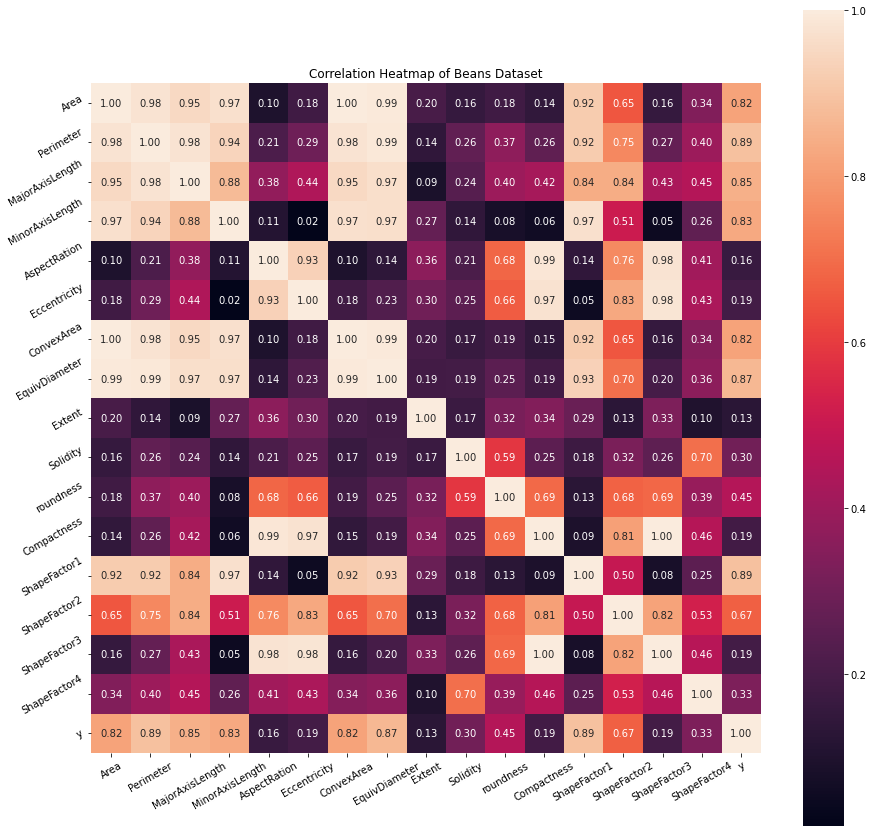

In [26]:
corr_matrix = data.corr().abs()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()


### Deal with Corr Data - Try with / without dropping

In [27]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


/var/folders/pt/jyznl8l11dnchkwt6_m3kqy80000gn/T/ipykernel_6738/3248188976.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [28]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop



['Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'ConvexArea',
 'EquivDiameter',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor3']

In [29]:
data_dropped = data.drop(to_drop, axis=1)



In [30]:
data_test.drop(to_drop, axis=1, inplace=True)
ID = data_test['ID']
data_test.drop('ID', axis=1, inplace=True)


In [31]:
data_test.head()



,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,57659,1.972059,0.861896,0.620790,0.957982,0.793735,0.000989,0.962889
1,28772,1.440960,0.719993,0.767458,0.987812,0.909913,0.002365,0.997956
2,54677,1.364204,0.680198,0.753013,0.978857,0.827860,0.001856,0.995607
3,24827,1.449322,0.723831,0.716508,0.988297,0.932871,0.002526,0.998596
4,141850,1.513136,0.750492,0.804617,0.987263,0.868240,0.000981,0.991803


#### Note: We Will work first with the data_dropped 

### Handle data skewness and outliers

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

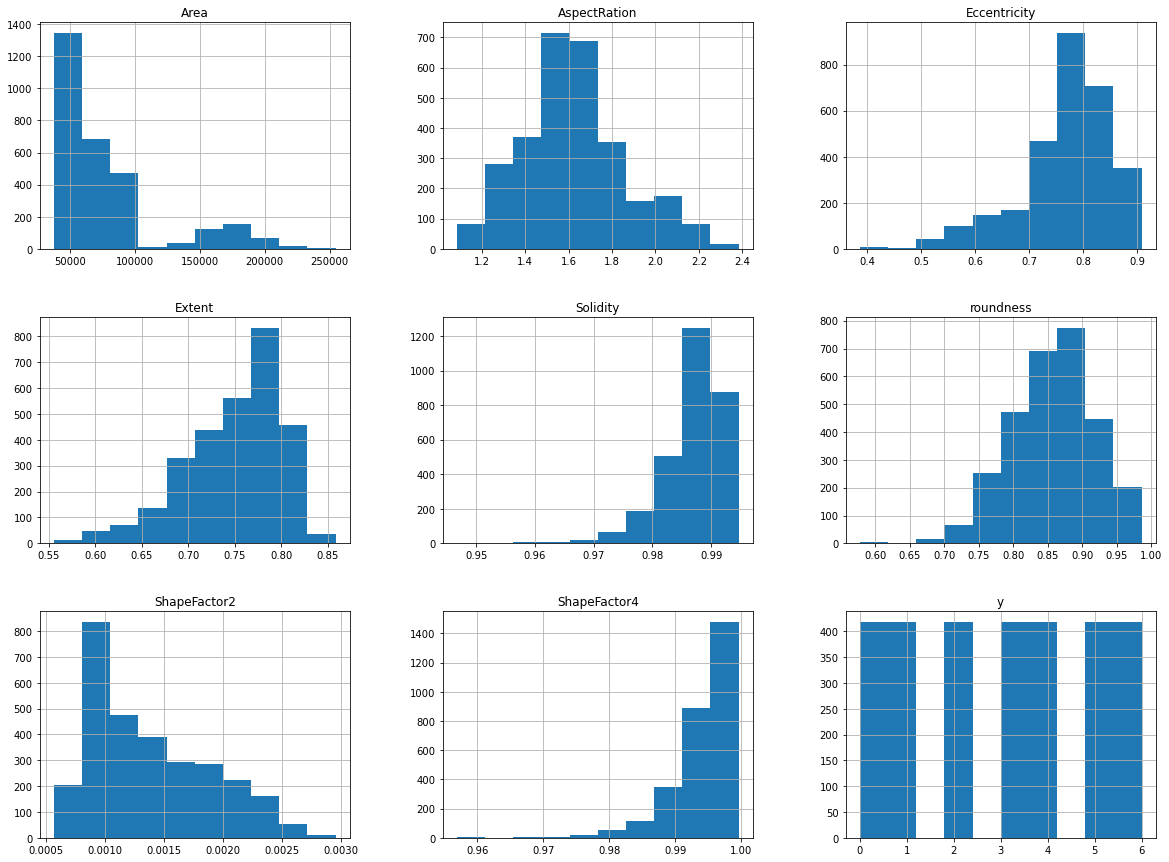

In [32]:

data_dropped.hist(figsize=(20,15))



In [33]:
data_dropped.skew().sort_values(ascending=False)



Area            1.666956
ShapeFactor2    0.679817
AspectRation    0.435592
y               0.000000
roundness      -0.398727
Extent         -0.847365
Eccentricity   -1.130666
Solidity       -1.994520
ShapeFactor4   -2.270401
dtype: float64

In [34]:
data_dropped['Area'] = data_dropped['Area'].apply(lambda x: np.log(x))
data_dropped['Solidity'] = data_dropped['Solidity'].apply(lambda x: np.log(x))
data_dropped['ShapeFactor4'] = data_dropped['ShapeFactor4'].apply(lambda x: np.log(x))



array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

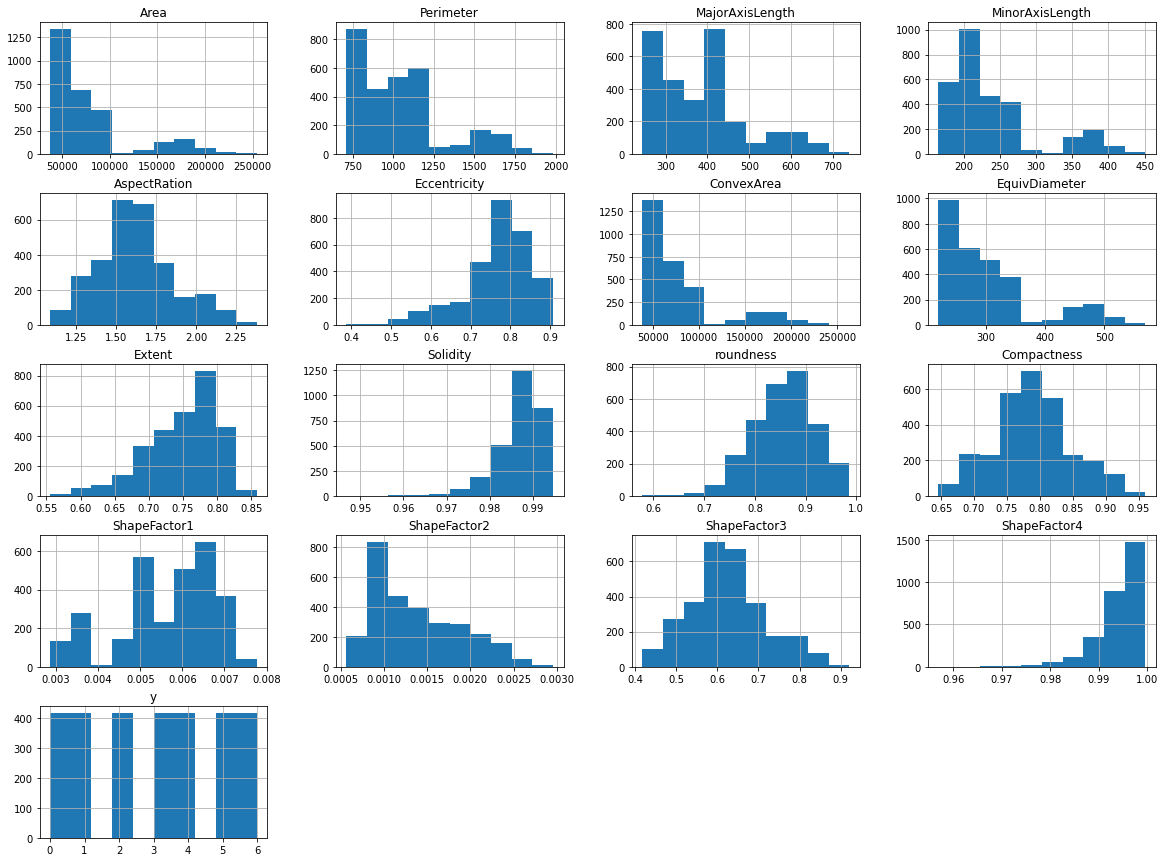

In [35]:
data.hist(figsize=(20,15))



In [36]:
data_dropped.skew().sort_values(ascending=False)



Area            0.881273
ShapeFactor2    0.679817
AspectRation    0.435592
y               0.000000
roundness      -0.398727
Extent         -0.847365
Eccentricity   -1.130666
Solidity       -2.034072
ShapeFactor4   -2.311021
dtype: float64

In [37]:
data_dropped.head()



,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,y
0,11.566864,1.612931,0.784610,0.747888,-0.014766,0.827993,0.001042,-0.002473,5
1,11.536437,1.593823,0.778679,0.739412,-0.016776,0.765523,0.001075,-0.004013,5
2,11.532875,1.592195,0.778162,0.804973,-0.018319,0.792356,0.001070,-0.008903,5
3,11.521350,1.710076,0.811200,0.792036,-0.011525,0.752442,0.000976,-0.002971,5
4,11.495545,1.516810,0.751899,0.706556,-0.023680,0.742503,0.001183,-0.003187,5


In [38]:
data_dropped.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          2926 non-null   float64
 1   AspectRation  2926 non-null   float64
 2   Eccentricity  2926 non-null   float64
 3   Extent        2926 non-null   float64
 4   Solidity      2926 non-null   float64
 5   roundness     2926 non-null   float64
 6   ShapeFactor2  2926 non-null   float64
 7   ShapeFactor4  2926 non-null   float64
 8   y             2926 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 205.9 KB


### Split Data

In [39]:
train_data, val_data = train_test_split(data_dropped, test_size=0.2, random_state=42, shuffle=True, stratify=data_dropped.y) 

x_train = train_data.drop(columns=['y'])
y_train = train_data['y']

x_val = val_data.drop(columns=['y'])
y_val = val_data['y']

In [40]:
x_train.shape[0], x_val.shape[0]


(2340, 586)

In [41]:
y_train.shape[0], y_val.shape[0]



(2340, 586)

### Normalize

In [42]:
### Normalize Tained Data
x_train_norm = normalize(x_train)

### Normalize Validation Data
x_val_norm = normalize(x_val)



In [43]:
data_test_norm = normalize(data_test)


In [44]:
data_test_norm

array([[9.99999999e-01, 3.42020987e-05, 1.49481691e-05, ...,
        1.37660226e-05, 1.71521680e-08, 1.66997253e-05],
       [9.99999996e-01, 5.00820398e-05, 2.50240776e-05, ...,
        3.16249475e-05, 8.21994079e-08, 3.46849687e-05],
       [9.99999999e-01, 2.49502404e-05, 1.24403026e-05, ...,
        1.51409154e-05, 3.39422569e-08, 1.82088846e-05],
       ...,
       [9.99999999e-01, 3.34405701e-05, 1.42522877e-05, ...,
        1.23584254e-05, 1.46991876e-08, 1.56428267e-05],
       [9.99999997e-01, 4.37303869e-05, 2.17377000e-05, ...,
        2.57303476e-05, 5.97240897e-08, 2.91273866e-05],
       [9.99999999e-01, 3.11928656e-05, 1.54200293e-05, ...,
        1.83030367e-05, 3.34521921e-08, 2.02764918e-05]])

### Feature Engineering

### Fix Imbalance Classes - Using Weights

<AxesSubplot:>

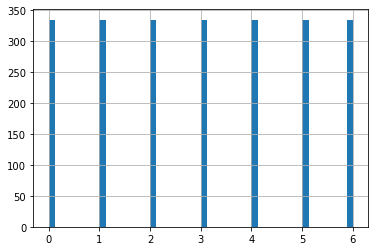

In [45]:
y_train.hist(bins=int(np.sqrt(y_train.shape[0])))



In [46]:
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )


In [47]:
weights = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    weights[i] = class_weights[val-1]
    

In [48]:
class_weights


array([0.9978678 , 0.9978678 , 1.00085543, 1.00085543, 1.00085543,
       1.00085543, 1.00085543])

In [49]:
len(weights)


2340

In [50]:
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights


{0: 0.997867803837953,
 1: 0.997867803837953,
 2: 1.0008554319931566,
 3: 1.0008554319931566,
 4: 1.0008554319931566,
 5: 1.0008554319931566,
 6: 1.0008554319931566}

In [51]:
y_train.value_counts()


1    335
0    335
4    334
2    334
5    334
3    334
6    334
Name: y, dtype: int64

### Model Trainning

In [52]:
exgb_classifier = XGBClassifier()


In [53]:
# ## Hyper Parameter Optimization
# n_estimators = [100, 500, 900]
# max_depth = [5, 10, 20]
# booster=['gbtree','dart']
# learning_rate=[0.05,0.15,0.25]
# base_score=[0.25,0.5,0.75]


# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'booster':booster,
#     'base_score':base_score
#     }

In [54]:
# random_search_cv = RandomizedSearchCV(
#                         estimator=exgb_classifier,
#                         param_distributions=hyperparameter_grid,
#                         scoring = 'f1_micro',
#                         random_state=0,
#                         )

In [55]:
# random_search_cv.fit(x_train_norm,
#                      y_train,
#                      sample_weight = weights)

In [56]:
# random_search_cv.best_estimator_

In [57]:
# exgb_classifier =XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#               gamma=0, gpu_id=-1, importance_type=None,
#               interaction_constraints='', learning_rate=0.5, max_delta_step=0.1,
#               max_depth=6, min_child_weight=1, missing=np.nan,
#               monotone_constraints='()', n_estimators=400, n_jobs=8,
#               num_parallel_tree=4, objective='multi:softprob', predictor='auto',
#               random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
#               subsample=1, tree_method='exact', validate_parameters=1,
#               verbosity=None)


In [58]:
exgb_classifier.fit(x_train_norm,
                     y_train)


/Users/omarmarie/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:20:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [59]:
y_pred=exgb_classifier.predict(x_val_norm)


In [60]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.93      0.89      0.91        83
           2       0.93      0.93      0.93        84
           3       0.94      0.98      0.96        84
           4       0.96      0.96      0.96        84
           5       0.96      0.96      0.96        84
           6       0.99      1.00      0.99        84

    accuracy                           0.96       586
   macro avg       0.96      0.96      0.96       586
weighted avg       0.96      0.96      0.96       586



In [61]:
f1_score(y_val, y_pred, average='micro')



0.9573378839590444

#### Random Forest Classifier

In [74]:
clf = RandomForestClassifier(n_estimators=500,
                             criterion='gini',
                             max_depth=None,
                             min_samples_split=3,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features='sqrt',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             bootstrap=True,
                             oob_score=False,
                             n_jobs=4,
                             random_state=None
                             , verbose=0,
                             warm_start=False,
                             class_weight=None,
                             ccp_alpha=0.0,
                             max_samples=None)

In [75]:
clf.fit(x_train_norm, y_train)



RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=10, n_jobs=4)

In [76]:
ypred_rf = clf.predict(x_val_norm)



In [77]:
f1_score(y_val, ypred_rf, average='micro')


0.9556313993174061

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


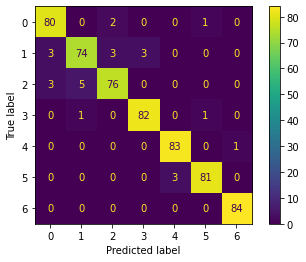

In [78]:
plot_confusion_matrix(clf,x_val_norm,y_val);



In [79]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.93      0.89      0.91        83
           2       0.93      0.93      0.93        84
           3       0.94      0.98      0.96        84
           4       0.96      0.96      0.96        84
           5       0.96      0.96      0.96        84
           6       0.99      1.00      0.99        84

    accuracy                           0.96       586
   macro avg       0.96      0.96      0.96       586
weighted avg       0.96      0.96      0.96       586

